<a href="https://colab.research.google.com/github/hinkim/Machine_Learning/blob/master/ML_edu2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic classification

-> linear regresion으로 쓰면 문제가 있음

-> 0과 1로만 분류하기 때문에 아무리 큰 값이 들어와도 y는 1보다 클 수 없음

-> 0 ~ 1 사이로 출력할 수 있는 함수가 필요함

-> sigmoid function (logistic function)

## Cost function

-> linear regression으로 가설을 세웠을 때의 cost function 같이 2차원 모양의 곡선이 아님

-> 울퉁불퉁한 곡선의 형태기 때문에 시작하는 점에 따라서 global minimum이 아니라 local minimum을 찾을 수 있음

-> 따라서 gradient descent algorithm 사용 불가

### Cost값의 의미
-> 실제 값과 예측한 값이 같으면 or 비슷하면 cost값은 작아지고, 예측한 값이 틀리면 cost값은 커짐

<img width="297" alt="Logistic_cost" src="https://user-images.githubusercontent.com/51468250/67644361-37d0fe00-f964-11e9-877a-2223474fc668.PNG">

-> -ylog(H(x)) - (1-y)log(1-H(x))


In [0]:
# Lab 5 Logistic Regression Classifier

import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [37]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
# hypothesis값이 0.5보다 크면 true, 아니면 false로 나타낼텐데 float32 type으로
# cast하면 1 or 0으로 나타낼 수 있음
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 0.84807867
200 0.58504885
400 0.55539876
600 0.53128415
800 0.51020116
1000 0.49101636
1200 0.4731789
1400 0.45640385
1600 0.44053388
1800 0.42547455
2000 0.41116396
2200 0.39755607
2400 0.38461316
2600 0.3723019
2800 0.36059117
3000 0.3494512
3200 0.33885324
3400 0.32876936
3600 0.31917262
3800 0.31003675
4000 0.3013368
4200 0.29304847
4400 0.28514892
4600 0.27761635
4800 0.27043003
5000 0.26357028
5200 0.25701866
5400 0.25075755
5600 0.24477072
5800 0.2390427
6000 0.2335589
6200 0.22830574
6400 0.22327043
6600 0.218441
6800 0.21380605
7000 0.20935528
7200 0.2050788
7400 0.20096724
7600 0.19701199
7800 0.19320484
8000 0.18953824
8200 0.18600498
8400 0.1825984
8600 0.17931205
8800 0.17614006
9000 0.17307681
9200 0.17011712
9400 0.16725604
9600 0.16448902
9800 0.16181149
10000 0.15921949

Hypothesis:  [[0.03493407]
 [0.16416825]
 [0.32434478]
 [0.7726206 ]
 [0.9339197 ]
 [0.9782899 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


In [38]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [39]:
!ls "/gdrive/My Drive" | grep data*

data-03-diabetes.csv
data-04-zoo.csv


In [40]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('/gdrive/My Drive/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

(759, 8) (759, 1)


In [41]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nAccuracy: ", a)


0 0.6161271
1000 0.56596977
2000 0.537397
3000 0.5191828
4000 0.5070188
5000 0.4985801
6000 0.4925432
7000 0.4881148
8000 0.48479846
9000 0.48227128
10000 0.4803167

Accuracy:  0.77602106


## Softmax classification
##### 데이터를 2개 이상의 그룹으로 나누기 위해 binary classification (Logistic Regression)을 확장한 모델

Multinomial classification

<img width="443" alt="Softmax_concept" src="https://user-images.githubusercontent.com/51468250/67645291-1fb0ad00-f96b-11e9-9cae-bb439c6f549d.PNG">

각각 독립된 3개의 클래스를 가지고 동작

X -> A -> Y' = A인지 아닌지만 확인 <br>
X -> B -> Y' = B인지 아닌지만 확인 <br>
X -> C -> Y' = C인지 아닌지만 확인

<img width="494" alt="Softmax_concept2" src="https://user-images.githubusercontent.com/51468250/67645366-b67d6980-f96b-11e9-8d30-eee0a9ac6ca6.PNG">


## Cost function

cross-entropy



In [0]:
# Lab 6 Softmax Classifier
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [43]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 9.055746
200 0.5518613
400 0.44513813
600 0.35089633
800 0.26192346
1000 0.22470412
1200 0.20409891
1400 0.1868866
1600 0.17228425
1800 0.15974122
2000 0.14885426
--------------
[[1.9264005e-03 9.9806339e-01 1.0254445e-05]] [1]
--------------
[[0.9115941  0.07665096 0.01175495]] [0]
--------------
[[1.0441232e-08 3.1730966e-04 9.9968266e-01]] [2]
--------------
[[1.9264014e-03 9.9806339e-01 1.0254435e-05]
 [9.1159415e-01 7.6650955e-02 1.1754937e-02]
 [1.0441233e-08 3.1730966e-04 9.9968266e-01]] [1 0 2]


In [44]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('/gdrive/My Drive/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

'''
(101, 16) (101, 1)
'''

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape one_hot:", Y_one_hot)

'''
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
'''

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

(101, 16) (101, 1)
one_hot: Tensor("one_hot_1:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape_1:0", shape=(?, 7), dtype=float32)


In [45]:
# Cross entropy cost/loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=tf.stop_gradient([Y_one_hot])))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})
                                        
        if step % 200 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))


Step:     0	Cost: 11.225	Acc: 11.88%
Step:   200	Cost: 0.327	Acc: 91.09%
Step:   400	Cost: 0.198	Acc: 97.03%
Step:   600	Cost: 0.146	Acc: 97.03%
Step:   800	Cost: 0.117	Acc: 100.00%
Step:  1000	Cost: 0.098	Acc: 100.00%
Step:  1200	Cost: 0.084	Acc: 100.00%
Step:  1400	Cost: 0.074	Acc: 100.00%
Step:  1600	Cost: 0.066	Acc: 100.00%
Step:  1800	Cost: 0.059	Acc: 100.00%
Step:  2000	Cost: 0.054	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] 

## Tips

### Learning rate
common: 0.01, cost값이 발산하게 되면 줄이고, cost값이 너무 천천히 작아진다면 크게 조정

### Data preprocessing
normalized data: 값의 범위가 어떤 범위 안에 들어가도록 조정 (데이터 중에 차이가 크게 나는 것이 있는지 확인) 

### Overfitting
가지고 있는 데이터에만 맞춰져 있는 모델이라, 실제적으로 사용할 때는 정확도가 떨어질 수 있음 <br>
-> More training data <br>
-> Reduce the number of features <br>
-> Regularization





In [0]:
# Lab 7 Learning rate and Evaluation
# Normal learning rate

import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [47]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step % 20 == 0:
          print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 2.1444025 [[-0.6453531  -1.4070444   1.1613661 ]
 [ 0.69393617  1.640023    0.7581979 ]
 [ 0.53586733 -0.38953224 -1.1654013 ]]
20 0.82288337 [[-0.89059854 -1.415377    1.4149445 ]
 [ 0.8119314   1.1885427   1.0916829 ]
 [ 0.09490148 -0.28896475 -0.82500273]]
40 0.7345104 [[-1.0484712  -1.3928951   1.5503352 ]
 [ 0.9855602   1.0551983   1.0513989 ]
 [-0.01264633 -0.15775906 -0.84866047]]
60 0.69320047 [[-1.1800117  -1.3816211   1.6706018 ]
 [ 1.0712421   0.999482    1.0214337 ]
 [-0.04597051 -0.10175525 -0.8713401 ]]
80 0.66570395 [[-1.2953715  -1.3745397   1.7788804 ]
 [ 1.1161827   0.9793133   0.9966619 ]
 [-0.04564597 -0.0799362  -0.89348376]]
100 0.6438613 [[-1.4000415  -1.3684808   1.8774914 ]
 [ 1.1416913   0.97436255  0.9761042 ]
 [-0.03016286 -0.07308695 -0.915816  ]]
120 0.6252973 [[-1.4970335  -1.3622104   1.968213  ]
 [ 1.15717     0.97576636  0.95922226]
 [-0.00766925 -0.07286084 -0.9385357 ]]
140 0.60902494 [[-1.5881504  -1.3553007   2.0524201 ]
 [ 1.167076    0.979656  

In [58]:
# Big learning rate
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.7).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 4.748129 [[ 0.21938549  0.38984972  3.144104  ]
 [-4.092165    1.7296969   0.82555515]
 [-2.6020536   4.08962    -0.08477351]]
1 inf [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
2 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
3 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
4 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
5 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
6 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
7 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
8 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
9 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Prediction: [0 0 0]
Accuracy:  0.0


In [49]:
# Small learning rate
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step % 20 == 0:
          print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 2.1444025 [[-0.6263353  -1.3909553   1.1262592 ]
 [ 0.6991377   1.7296646   0.6633548 ]
 [ 0.57651556 -0.34551203 -1.2500697 ]]
20 2.1444025 [[-0.6263353  -1.3909553   1.1262592 ]
 [ 0.6991377   1.7296646   0.6633548 ]
 [ 0.57651556 -0.34551203 -1.2500697 ]]
40 2.1444025 [[-0.6263353  -1.3909553   1.1262592 ]
 [ 0.6991377   1.7296646   0.6633548 ]
 [ 0.57651556 -0.34551203 -1.2500697 ]]
60 2.1444025 [[-0.6263353  -1.3909553   1.1262592 ]
 [ 0.6991377   1.7296646   0.6633548 ]
 [ 0.57651556 -0.34551203 -1.2500697 ]]
80 2.1444025 [[-0.6263353  -1.3909553   1.1262592 ]
 [ 0.6991377   1.7296646   0.6633548 ]
 [ 0.57651556 -0.34551203 -1.2500697 ]]
100 2.1444025 [[-0.6263353  -1.3909553   1.1262592 ]
 [ 0.6991377   1.7296646   0.6633548 ]
 [ 0.57651556 -0.34551203 -1.2500697 ]]
120 2.1444025 [[-0.6263353  -1.3909553   1.1262592 ]
 [ 0.6991377   1.7296646   0.6633548 ]
 [ 0.57651556 -0.34551203 -1.2500697 ]]
140 2.1444025 [[-0.6263353  -1.3909553   1.1262592 ]
 [ 0.6991377   1.7296646   0.

### MNIST Dataset

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0001, Cost: 2.672426570
Epoch: 0002, Cost: 1.076048675
Epoch: 0003, Cost: 0.868284545
Epoch: 0004, Cost: 0.767021303
Epoch: 0005, Cost: 0.703292290
Epoch: 0006, Cost: 0.657308690
Epoch: 0007, Cost: 0.621956688
Epoch: 0008, Cost: 0.593385604
Epoch: 0009, Cost: 0.569349916
Epoch: 0010, Cost: 0.549566229
Epoch: 0011, Cost: 0.532382537
Epoch: 0012, Cost: 0.517615450
Epoch: 0013, Cost: 0.503979745
Epoch: 0014, Cost: 0.492164900
Epoch: 0015, Cost: 0.480872580
Epoch: 0016, Cost: 0.471145752
Epoch: 0017, Cost: 0.462535726
Epoch: 0018, Cost: 0.453660646
Epoch: 0019, Cost: 0.446642911
Epoch: 0020, Cost: 0.439076144
Learning finished
Accuracy:  0.8923
Label:  [9]
Prediction:  [9]


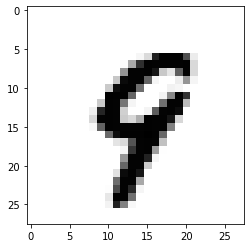

In [51]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 20
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    # sess.run() == eval()
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()